In [ ]:
# 🚔 VISUALIZADOR DE RESULTADOS - MODELO DE PATRULLAJE PREVENTIVO

Este notebook analiza y visualiza los resultados del modelo de optimización de patrullaje preventivo.

## 📊 Gráficos disponibles:
1. **Mapa de calor**: Distribución de patrullas por zona y día
2. **Gráfico de barras**: Recursos por comuna
3. **Línea de tiempo**: Evolución temporal de recursos
4. **Pie charts**: Distribución de tipos de vehículos
5. **Análisis de peligrosidad**: Comparación antes/después
6. **Dashboard interactivo**: Resumen ejecutivo


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📊 Librerías cargadas exitosamente")
print("🎨 Estilos configurados")


📊 Librerías cargadas exitosamente
🎨 Estilos configurados


In [6]:
# Cargar datos
try:
    # Resultados del modelo
    variables_df = pd.read_excel("resultados/variables_activas.xlsx")
    resumen_df = pd.read_excel("resultados/resumen_diario_recursos.xlsx")
    
    # Datos base
    zonas_df = pd.read_csv("data/zonas.csv")
    vehiculos_df = pd.read_csv("data/vehiculos.csv")
    carabineros_df = pd.read_csv("data/carabineros.csv")
    
    print("✅ Datos cargados exitosamente:")
    print(f"   • Variables activas: {len(variables_df):,}")
    print(f"   • Días de resumen: {len(resumen_df)}")
    print(f"   • Zonas disponibles: {len(zonas_df)}")
    print(f"   • Vehículos totales: {len(vehiculos_df)}")
    
except Exception as e:
    print(f"❌ Error cargando datos: {e}")
    print("💡 Asegúrate de ejecutar 'python main.py' primero para generar los resultados")


✅ Datos cargados exitosamente:
   • Variables activas: 2,985
   • Días de resumen: 30
   • Zonas disponibles: 32
   • Vehículos totales: 1026


In [7]:
# Procesar datos para visualización

# 1. Mapear zonas utilizadas
zonas_utilizadas = set()
dias_utilizados = set()
vehiculos_utilizados = set()

for _, row in variables_df.iterrows():
    var_name = row['variable']
    if var_name.startswith('x['):  # x[p,z,m,t]
        match = re.search(r'x\[(\d+),(\d+),(\d+),(\d+)\]', var_name)
        if match:
            p, z, m, t = map(int, match.groups())
            zonas_utilizadas.add(z)
            dias_utilizados.add(t)
            vehiculos_utilizados.add(p)

# 2. Crear mapeo de nombres
zona_nombres = {}
for zona_id in zonas_utilizadas:
    zona_row = zonas_df[zonas_df['id_zona'] == zona_id]
    if not zona_row.empty:
        zona_nombres[zona_id] = zona_row.iloc[0]['nombre_zona']
    else:
        zona_nombres[zona_id] = f"Zona {zona_id}"

# 3. Tipos de vehículos
tipos_vehiculos = {1: "Peatón", 2: "Moto", 3: "Bicicleta", 4: "Caballo", 5: "Auto", 6: "Furgón"}

print(f"🏙️ Zonas procesadas: {len(zonas_utilizadas)}")
print(f"📅 Días procesados: {len(dias_utilizados)}")
print(f"🚗 Vehículos procesados: {len(vehiculos_utilizados)}")
print(f"\n📍 Zonas utilizadas:")
for zona_id in sorted(zonas_utilizadas):
    print(f"   • ID {zona_id}: {zona_nombres[zona_id]}")


🏙️ Zonas procesadas: 5
📅 Días procesados: 30
🚗 Vehículos procesados: 92

📍 Zonas utilizadas:
   • ID 4: Estación Central
   • ID 8: La Florida
   • ID 17: Maipú
   • ID 21: Providencia
   • ID 30: Santiago


In [ ]:
## 🔥 GRÁFICO DE CALOR: Distribución de Patrullas por Zona y Día


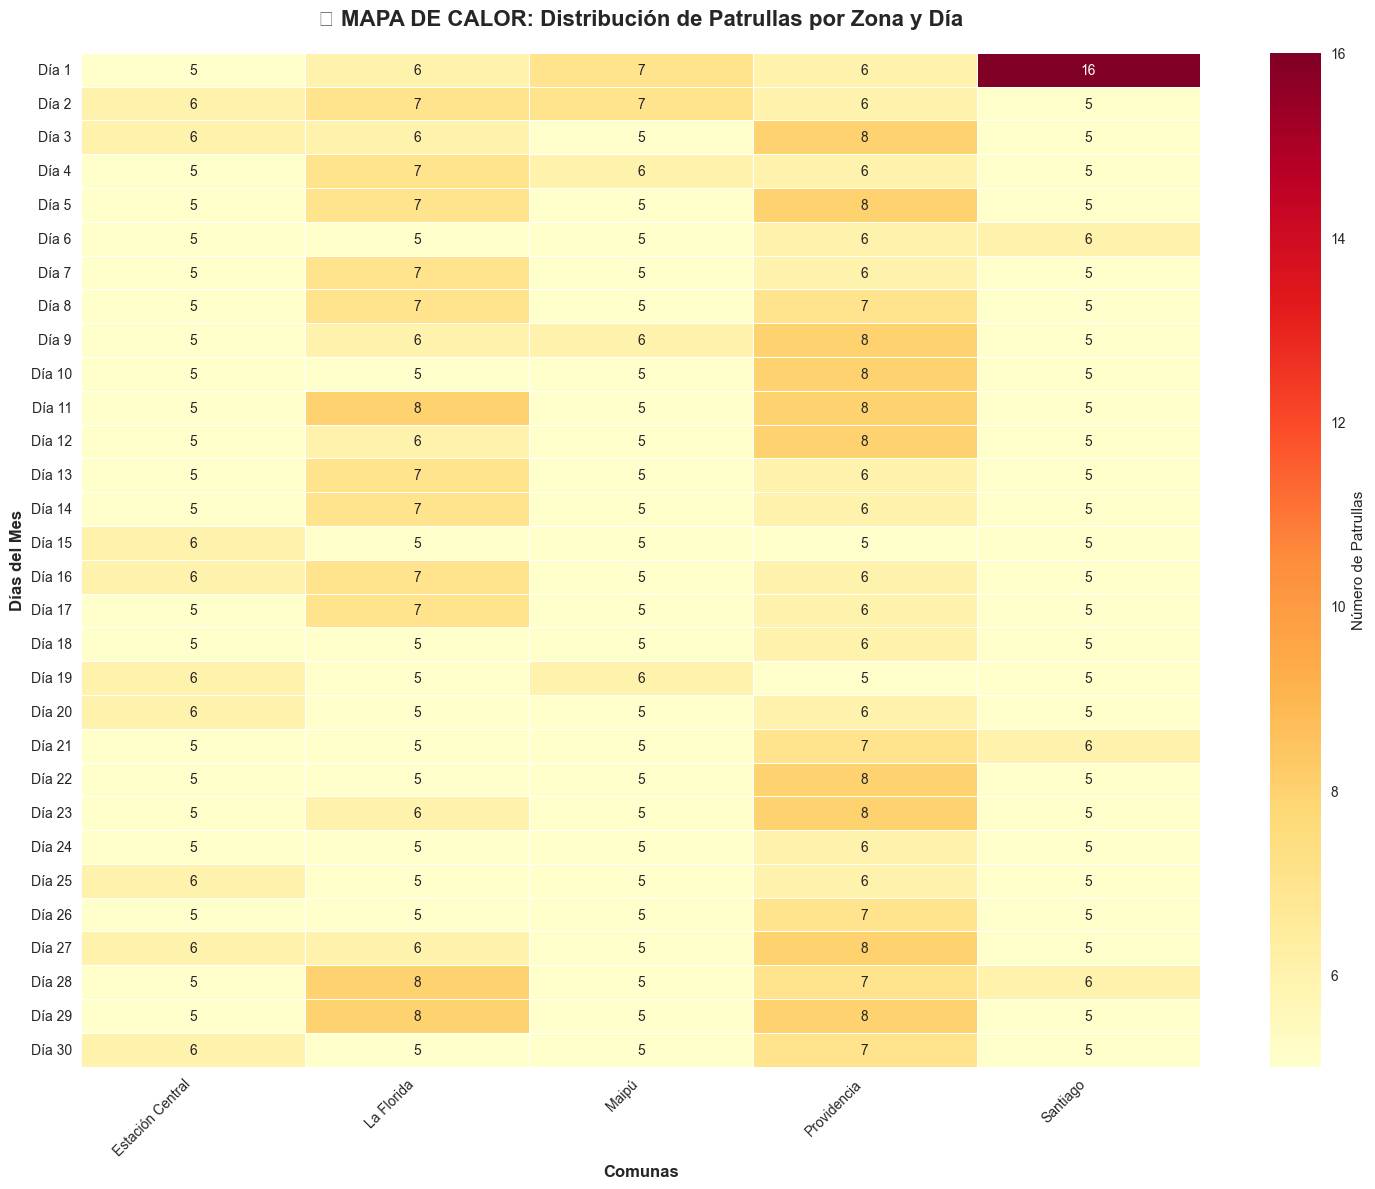

📊 Matriz de 30 días × 5 zonas
🎯 Total patrullas visualizadas: 866


In [8]:
# Crear matriz de patrullas por zona y día
patrullas_matriz = defaultdict(lambda: defaultdict(int))

for _, row in variables_df.iterrows():
    var_name = row['variable']
    if var_name.startswith('x['):  # x[p,z,m,t]
        match = re.search(r'x\[(\d+),(\d+),(\d+),(\d+)\]', var_name)
        if match:
            p, z, m, t = map(int, match.groups())
            patrullas_matriz[t][z] += 1

# Convertir a DataFrame para el heatmap
dias_sorted = sorted(dias_utilizados)
zonas_sorted = sorted(zonas_utilizadas)

heatmap_data = []
for dia in dias_sorted:
    fila = []
    for zona in zonas_sorted:
        fila.append(patrullas_matriz[dia][zona])
    heatmap_data.append(fila)

heatmap_df = pd.DataFrame(heatmap_data, 
                         index=[f"Día {d}" for d in dias_sorted],
                         columns=[zona_nombres[z] for z in zonas_sorted])

# Crear el gráfico de calor
plt.figure(figsize=(15, 12))
sns.heatmap(heatmap_df, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Número de Patrullas'},
            linewidths=0.5)

plt.title('🔥 MAPA DE CALOR: Distribución de Patrullas por Zona y Día', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Comunas', fontsize=12, fontweight='bold')
plt.ylabel('Días del Mes', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"📊 Matriz de {len(dias_sorted)} días × {len(zonas_sorted)} zonas")
print(f"🎯 Total patrullas visualizadas: {heatmap_df.values.sum()}")


In [ ]:
## 📊 GRÁFICO DE BARRAS: Recursos Totales por Comuna


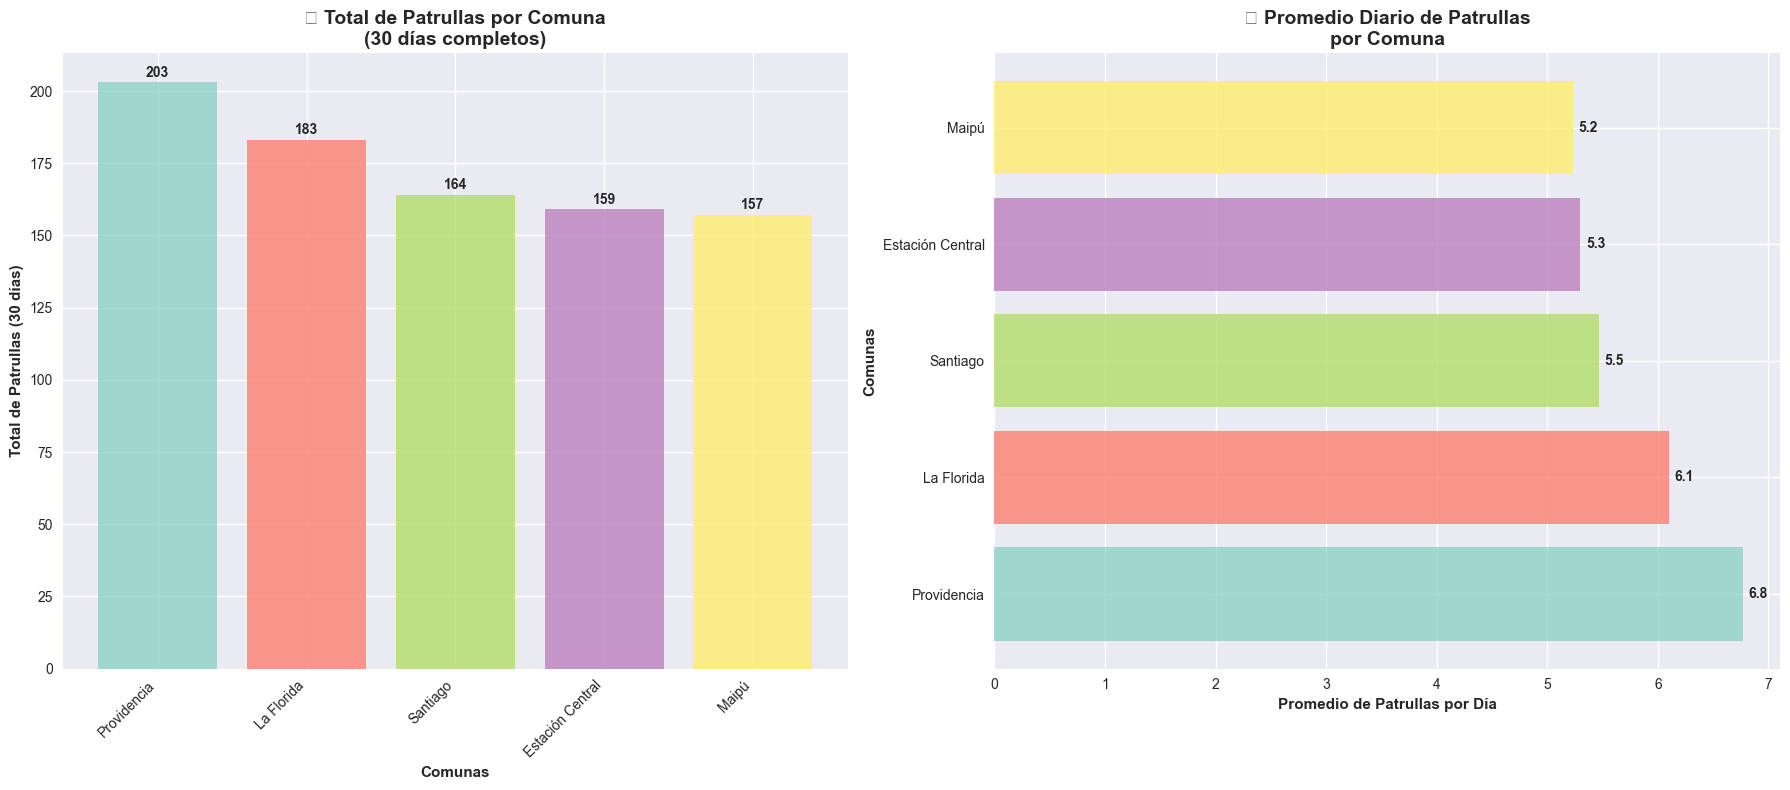

📊 ESTADÍSTICAS POR COMUNA:
• Providencia: 203 patrullas total (6.8 promedio/día)
• La Florida: 183 patrullas total (6.1 promedio/día)
• Santiago: 164 patrullas total (5.5 promedio/día)
• Estación Central: 159 patrullas total (5.3 promedio/día)
• Maipú: 157 patrullas total (5.2 promedio/día)


In [9]:
# Calcular totales por zona
totales_por_zona = heatmap_df.sum(axis=0).sort_values(ascending=False)

# Gráfico de barras con matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico 1: Barras verticales
colores = plt.cm.Set3(np.linspace(0, 1, len(totales_por_zona)))
bars1 = ax1.bar(range(len(totales_por_zona)), totales_por_zona.values, color=colores, alpha=0.8)
ax1.set_xlabel('Comunas', fontweight='bold')
ax1.set_ylabel('Total de Patrullas (30 días)', fontweight='bold')
ax1.set_title('📊 Total de Patrullas por Comuna\n(30 días completos)', fontweight='bold', fontsize=14)
ax1.set_xticks(range(len(totales_por_zona)))
ax1.set_xticklabels(totales_por_zona.index, rotation=45, ha='right')

# Agregar valores sobre las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Barras horizontales (promedio diario)
promedio_diario = totales_por_zona / len(dias_sorted)
bars2 = ax2.barh(range(len(promedio_diario)), promedio_diario.values, color=colores, alpha=0.8)
ax2.set_xlabel('Promedio de Patrullas por Día', fontweight='bold')
ax2.set_ylabel('Comunas', fontweight='bold')
ax2.set_title('📈 Promedio Diario de Patrullas\npor Comuna', fontweight='bold', fontsize=14)
ax2.set_yticks(range(len(promedio_diario)))
ax2.set_yticklabels(promedio_diario.index)

# Agregar valores junto a las barras
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.05, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("📊 ESTADÍSTICAS POR COMUNA:")
print("=" * 50)
for zona, total in totales_por_zona.items():
    promedio = total / len(dias_sorted)
    print(f"• {zona}: {total} patrullas total ({promedio:.1f} promedio/día)")


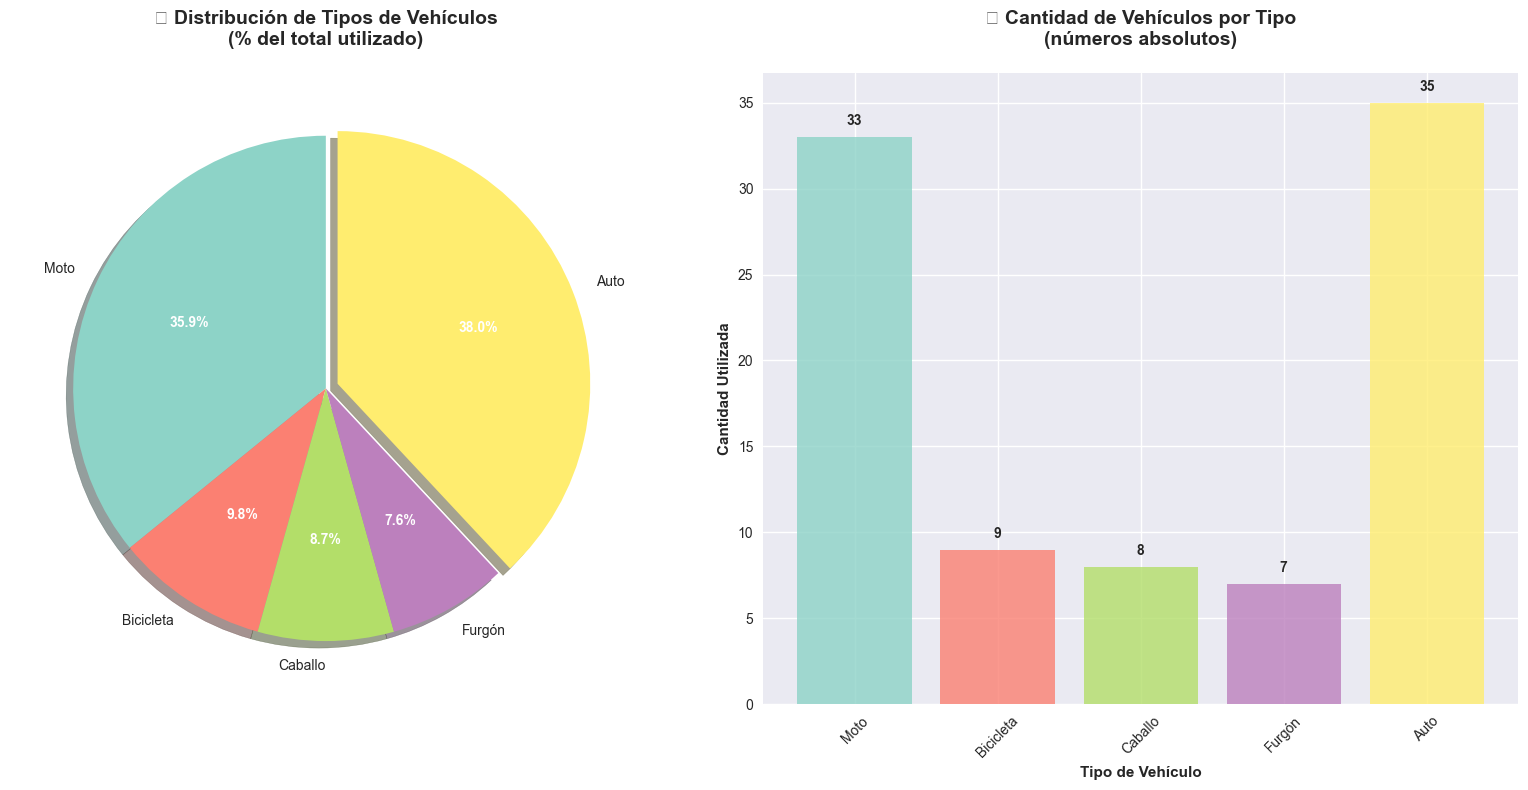

🚗 ANÁLISIS DE FLOTA UTILIZADA:
• Moto: 33 vehículos (35.9%)
• Bicicleta: 9 vehículos (9.8%)
• Caballo: 8 vehículos (8.7%)
• Furgón: 7 vehículos (7.6%)
• Auto: 35 vehículos (38.0%)

📊 Total vehículos utilizados: 92
📈 Eficiencia de flota: 9.0% del parque total


In [10]:
# Analizar tipos de vehículos utilizados
vehiculos_por_tipo = defaultdict(int)

for vehiculo_id in vehiculos_utilizados:
    vehiculo_row = vehiculos_df[vehiculos_df['id'] == vehiculo_id]
    if not vehiculo_row.empty:
        tipo = vehiculo_row.iloc[0]['tipo_medio']
        vehiculos_por_tipo[tipo] += 1

# Preparar datos para gráficos
tipos_nombres = [tipos_vehiculos.get(tipo, f"Tipo {tipo}") for tipo in vehiculos_por_tipo.keys()]
tipos_cantidades = list(vehiculos_por_tipo.values())
tipos_porcentajes = [(x/sum(tipos_cantidades))*100 for x in tipos_cantidades]

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de pie
colores_pie = plt.cm.Set3(np.linspace(0, 1, len(tipos_nombres)))
wedges, texts, autotexts = ax1.pie(tipos_cantidades, 
                                   labels=tipos_nombres,
                                   autopct='%1.1f%%',
                                   colors=colores_pie,
                                   explode=[0.05 if x == max(tipos_cantidades) else 0 for x in tipos_cantidades],
                                   shadow=True,
                                   startangle=90)

ax1.set_title('🥧 Distribución de Tipos de Vehículos\n(% del total utilizado)', 
              fontweight='bold', fontsize=14, pad=20)

# Mejorar apariencia del pie
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# Gráfico de barras
bars = ax2.bar(tipos_nombres, tipos_cantidades, color=colores_pie, alpha=0.8)
ax2.set_xlabel('Tipo de Vehículo', fontweight='bold')
ax2.set_ylabel('Cantidad Utilizada', fontweight='bold')
ax2.set_title('📊 Cantidad de Vehículos por Tipo\n(números absolutos)', 
              fontweight='bold', fontsize=14, pad=20)
ax2.tick_params(axis='x', rotation=45)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar estadísticas detalladas
print("🚗 ANÁLISIS DE FLOTA UTILIZADA:")
print("=" * 45)
total_vehiculos = sum(tipos_cantidades)
for i, (tipo, cantidad) in enumerate(zip(tipos_nombres, tipos_cantidades)):
    porcentaje = tipos_porcentajes[i]
    print(f"• {tipo}: {cantidad} vehículos ({porcentaje:.1f}%)")

print(f"\n📊 Total vehículos utilizados: {total_vehiculos}")
print(f"📈 Eficiencia de flota: {(total_vehiculos/len(vehiculos_df))*100:.1f}% del parque total")


In [18]:
# 🔥 ANÁLISIS DE DELITOS - Solo 5 Comunas del Modelo
# Cargar datos de delitos
try:
    incidencia_df = pd.read_csv("data/incidencia_delito.csv")
    tipos_delitos_df = pd.read_csv("data/tipos_delitos.csv")
    print("✅ Datos de delitos cargados exitosamente")
    print(f"   • Registros de incidencia: {len(incidencia_df):,}")
    print(f"   • Tipos de delitos: {len(tipos_delitos_df)}")
    
    # Mostrar las 5 comunas del modelo
    zonas_modelo_ids = [4, 8, 17, 21, 30]
    zonas_modelo_df = zonas_df[zonas_df['id_zona'].isin(zonas_modelo_ids)]
    print(f"\n🎯 Análisis enfocado en las 5 comunas del modelo:")
    for _, zona in zonas_modelo_df.iterrows():
        print(f"   • ID {zona['id_zona']}: {zona['nombre_zona']}")
    
except Exception as e:
    print(f"❌ Error cargando datos de delitos: {e}")
    incidencia_df = None
    tipos_delitos_df = None


✅ Datos de delitos cargados exitosamente
   • Registros de incidencia: 448
   • Tipos de delitos: 14

🎯 Análisis enfocado en las 5 comunas del modelo:
   • ID 4: Estación Central
   • ID 8: La Florida
   • ID 17: Maipú
   • ID 21: Providencia
   • ID 30: Santiago


In [17]:
# 🔥 MAPA DE CALOR: Tipos de Delito por las 5 Comunas del Modelo

if incidencia_df is not None and tipos_delitos_df is not None:
    # IDs de las 5 comunas del modelo
    zonas_modelo_ids = [4, 8, 17, 21, 30]
    
    # Seleccionar top 8 delitos más frecuentes
    delitos_promedio = []
    for _, delito in tipos_delitos_df.iterrows():
        delito_data = incidencia_df[incidencia_df['id_delito'] == delito['id_delito']]
        promedio = delito_data['incidencia'].mean()
        delitos_promedio.append({
            'id': delito['id_delito'],
            'nombre': delito['nombre_delito'],
            'promedio': promedio
        })
    
    delitos_top = pd.DataFrame(delitos_promedio).sort_values('promedio', ascending=False).head(8)
    
    # Crear matriz de incidencias solo para las 5 comunas
    matriz_delitos_zonas = []
    delitos_nombres = []
    zonas_nombres_modelo = []
    
    # Obtener nombres de las zonas del modelo
    for zona_id in zonas_modelo_ids:
        zona_nombre = zonas_df[zonas_df['id_zona'] == zona_id]['nombre_zona'].iloc[0]
        zonas_nombres_modelo.append(zona_nombre)
    
    # Crear matriz de incidencias
    for _, delito in delitos_top.iterrows():
        delito_id = delito['id']
        delito_nombre = delito['nombre']
        # Truncar nombres largos
        delitos_nombres.append(delito_nombre[:20] + '...' if len(delito_nombre) > 20 else delito_nombre)
        
        fila_zona = []
        for zona_id in zonas_modelo_ids:
            # Obtener incidencia para este delito en esta zona
            incidencia_data = incidencia_df[
                (incidencia_df['id_delito'] == delito_id) & 
                (incidencia_df['id_zona'] == zona_id)
            ]
            
            if not incidencia_data.empty:
                incidencia = incidencia_data['incidencia'].iloc[0]
            else:
                incidencia = 0
                
            fila_zona.append(incidencia)
        
        matriz_delitos_zonas.append(fila_zona)
    
    # Crear DataFrame para el heatmap
    heatmap_delitos_df = pd.DataFrame(
        matriz_delitos_zonas,
        index=delitos_nombres,
        columns=zonas_nombres_modelo
    )
    
    print(f"📊 Mapa de calor generado: {len(delitos_top)} delitos × {len(zonas_modelo_ids)} comunas")
    print(f"🎯 Comunas del modelo: {', '.join(zonas_nombres_modelo)}")
    
else:
    print("⚠️ No se pueden generar gráficos de delitos - datos no disponibles")


📊 Mapa de calor generado: 8 delitos × 5 comunas
🎯 Comunas del modelo: Estación Central, La Florida, Maipú, Providencia, Santiago


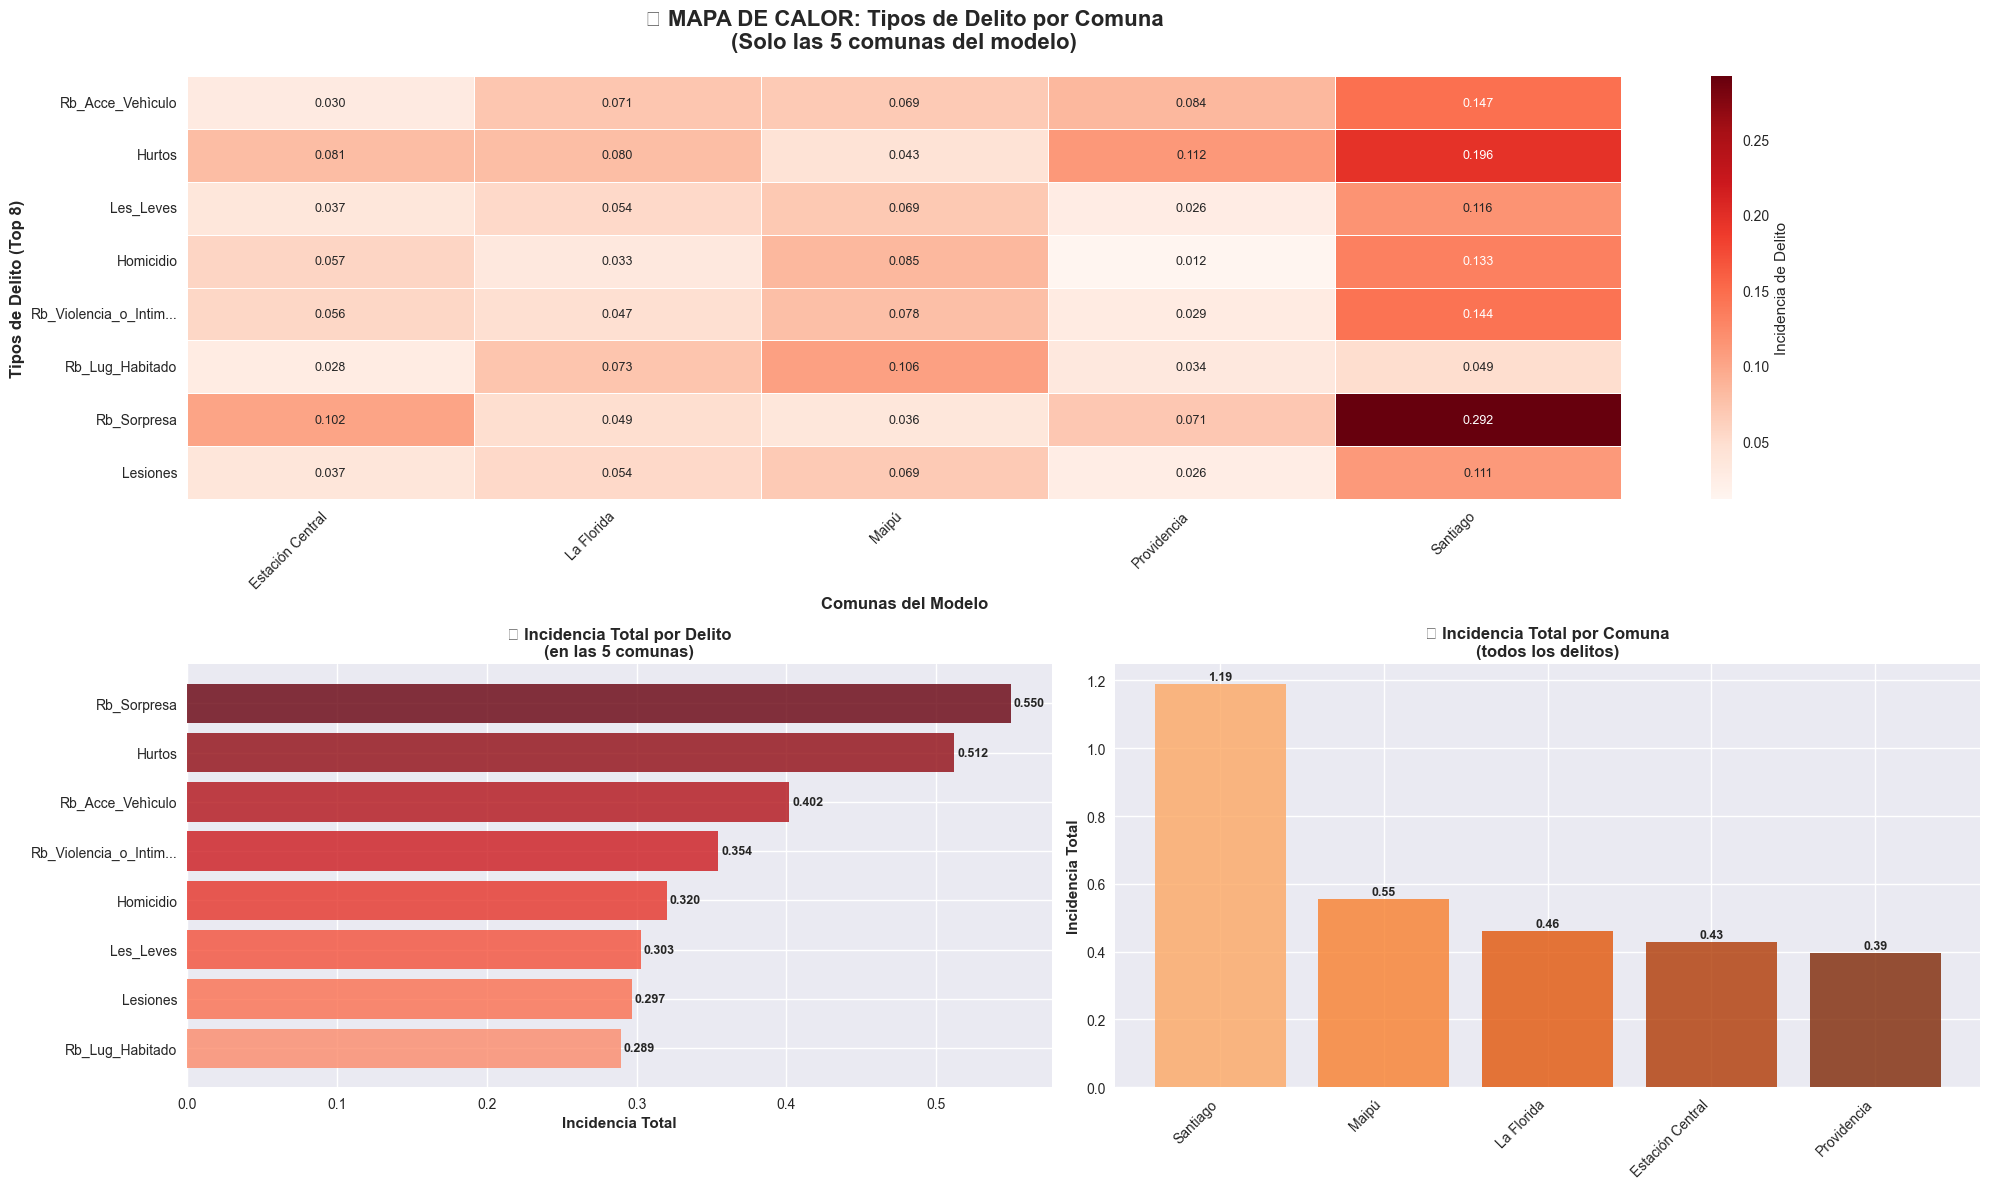


🔥 ANÁLISIS DE DELITOS POR COMUNA (Solo las 5 del modelo)

🏆 RANKING DE DELITOS (por incidencia total):
   1. Rb_Sorpresa: 0.5496
   2. Hurtos: 0.5121
   3. Rb_Acce_Vehìculo: 0.4017
   4. Rb_Violencia_o_Intim...: 0.3544
   5. Homicidio: 0.3202
   6. Les_Leves: 0.3027
   7. Lesiones: 0.2968
   8. Rb_Lug_Habitado: 0.2893

🎯 RANKING DE COMUNAS (por incidencia total):
   1. Santiago: 1.1881
   2. Maipú: 0.5544
   3. La Florida: 0.4607
   4. Estación Central: 0.4290
   5. Providencia: 0.3946

⚠️ COMBINACIÓN MÁS CRÍTICA:
   🔥 Rb_Sorpresa en Santiago: 0.2916


In [16]:
# 📊 VISUALIZAR MAPA DE CALOR DE DELITOS POR ZONA

if 'heatmap_delitos_df' in locals():
    # Crear visualización con 4 subplots
    plt.figure(figsize=(20, 12))
    
    # Mapa de calor principal (ocupa 2/3 del espacio)
    plt.subplot(2, 2, (1, 2))
    sns.heatmap(heatmap_delitos_df, 
                annot=True, 
                fmt='.3f',
                cmap='Reds',
                cbar_kws={'label': 'Incidencia de Delito'},
                linewidths=0.5,
                annot_kws={'size': 9})
    
    plt.title('🔥 MAPA DE CALOR: Tipos de Delito por Comuna\n(Solo las 5 comunas del modelo)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Comunas del Modelo', fontsize=12, fontweight='bold')
    plt.ylabel('Tipos de Delito (Top 8)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Gráfico de totales por delito
    plt.subplot(2, 2, 3)
    totales_delito = heatmap_delitos_df.sum(axis=1).sort_values(ascending=True)
    colors_delito = plt.cm.Reds(np.linspace(0.4, 1, len(totales_delito)))
    plt.barh(range(len(totales_delito)), totales_delito.values, color=colors_delito, alpha=0.8)
    plt.yticks(range(len(totales_delito)), [str(idx) for idx in totales_delito.index])
    plt.title('📊 Incidencia Total por Delito\n(en las 5 comunas)', fontweight='bold')
    plt.xlabel('Incidencia Total', fontweight='bold')
    
    # Agregar valores
    for i, v in enumerate(totales_delito.values):
        plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontweight='bold', fontsize=9)
    
    # Gráfico de totales por zona
    plt.subplot(2, 2, 4)
    totales_zona = heatmap_delitos_df.sum(axis=0).sort_values(ascending=False)
    colors_zona = plt.cm.Oranges(np.linspace(0.4, 1, len(totales_zona)))
    plt.bar(range(len(totales_zona)), totales_zona.values, color=colors_zona, alpha=0.8)
    plt.xticks(range(len(totales_zona)), [str(col) for col in totales_zona.index], rotation=45, ha='right')
    plt.title('🎯 Incidencia Total por Comuna\n(todos los delitos)', fontweight='bold')
    plt.ylabel('Incidencia Total', fontweight='bold')
    
    # Agregar valores
    for i, v in enumerate(totales_zona.values):
        plt.text(i, v + 0.003, f'{v:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas detalladas
    print("\n" + "="*80)
    print("🔥 ANÁLISIS DE DELITOS POR COMUNA (Solo las 5 del modelo)")
    print("="*80)
    
    print(f"\n🏆 RANKING DE DELITOS (por incidencia total):")
    for i, (delito, total) in enumerate(totales_delito.sort_values(ascending=False).items(), 1):
        print(f"   {i}. {delito}: {total:.4f}")
    
    print(f"\n🎯 RANKING DE COMUNAS (por incidencia total):")
    for i, (zona, total) in enumerate(totales_zona.items(), 1):
        print(f"   {i}. {zona}: {total:.4f}")
    
    # Identificar combinación más crítica
    max_valor = heatmap_delitos_df.values.max()
    max_pos = np.where(heatmap_delitos_df.values == max_valor)
    delito_critico = heatmap_delitos_df.index[max_pos[0][0]]
    zona_critica = heatmap_delitos_df.columns[max_pos[1][0]]
    
    print(f"\n⚠️ COMBINACIÓN MÁS CRÍTICA:")
    print(f"   🔥 {delito_critico} en {zona_critica}: {max_valor:.4f}")
    
else:
    print("⚠️ No hay datos de delitos para visualizar")


📈 Análisis temporal del delito más crítico: Rb_Sorpresa


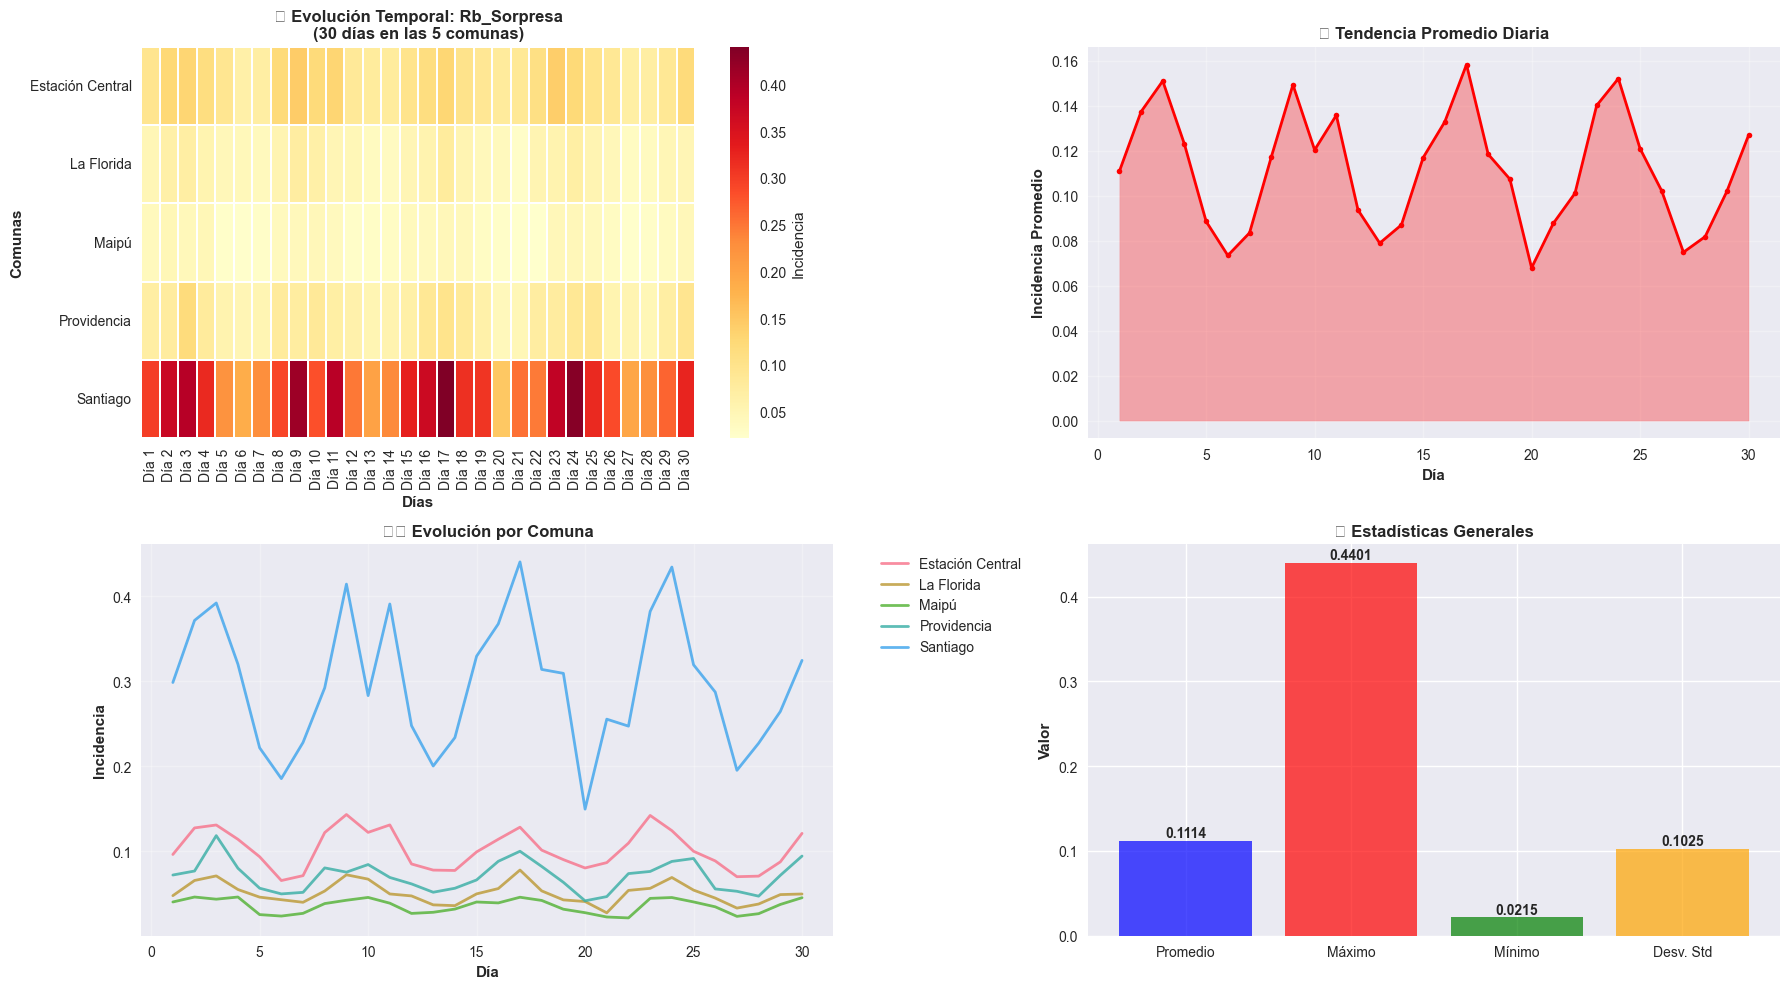


📊 RESUMEN DEL ANÁLISIS TEMPORAL:
   🔥 Delito analizado: Rb_Sorpresa
   📅 Período: 30 días
   🏙️ Comunas: 5
   📈 Incidencia promedio: 0.1114
   📈 Incidencia máxima: 0.4401
   📉 Incidencia mínima: 0.0215


In [21]:
# 🔥 EVOLUCIÓN TEMPORAL DE DELITOS - Solo 5 Comunas

if 'heatmap_delitos_df' in locals():
    # Seleccionar el delito más crítico para análisis temporal
    totales_delito = heatmap_delitos_df.sum(axis=1)
    delito_mas_critico_idx = totales_delito.idxmax()
    delito_mas_critico_id = delitos_top[delitos_top['nombre'] == delito_mas_critico_idx.replace('...', '').strip()]['id'].iloc[0]
    
    print(f"📈 Análisis temporal del delito más crítico: {delito_mas_critico_idx}")
    
    # Simular evolución temporal (30 días) para el delito más crítico
    dias = 30
    zonas_modelo_ids = [4, 8, 17, 21, 30]
    
    # Obtener incidencias base
    incidencias_base = []
    for zona_id in zonas_modelo_ids:
        base_data = incidencia_df[
            (incidencia_df['id_delito'] == delito_mas_critico_id) & 
            (incidencia_df['id_zona'] == zona_id)
        ]
        if not base_data.empty:
            incidencias_base.append(base_data['incidencia'].iloc[0])
        else:
            incidencias_base.append(0)
    
    # Simular variación temporal
    matriz_temporal = []
    for dia in range(dias):
        # Patrón semanal + variación aleatoria
        factor_semanal = 1 + 0.3 * np.sin(2 * np.pi * dia / 7)
        factor_aleatorio = np.random.normal(1, 0.1, len(incidencias_base))
        
        incidencia_dia = np.array(incidencias_base) * factor_semanal * factor_aleatorio
        matriz_temporal.append(incidencia_dia)
    
    # Crear DataFrame temporal
    heatmap_temporal = pd.DataFrame(
        matriz_temporal,
        index=[f"Día {d+1}" for d in range(dias)],
        columns=zonas_nombres_modelo
    )
    
    # Crear visualización temporal
    plt.figure(figsize=(18, 10))
    
    # Mapa de calor temporal
    plt.subplot(2, 2, 1)
    sns.heatmap(heatmap_temporal.T, 
                cmap='YlOrRd', 
                annot=False,
                cbar_kws={'label': 'Incidencia'},
                linewidths=0.1)
    plt.title(f'📅 Evolución Temporal: {delito_mas_critico_idx}\n(30 días en las 5 comunas)', 
              fontweight='bold')
    plt.xlabel('Días', fontweight='bold')
    plt.ylabel('Comunas', fontweight='bold')
    
    # Tendencia promedio
    plt.subplot(2, 2, 2)
    tendencia_diaria = heatmap_temporal.mean(axis=1)
    plt.plot(range(1, dias+1), tendencia_diaria, 'o-', linewidth=2, markersize=4, color='red')
    plt.fill_between(range(1, dias+1), tendencia_diaria, alpha=0.3, color='red')
    plt.title('📈 Tendencia Promedio Diaria', fontweight='bold')
    plt.xlabel('Día', fontweight='bold')
    plt.ylabel('Incidencia Promedio', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Evolución por comuna
    plt.subplot(2, 2, 3)
    for i, zona in enumerate(zonas_nombres_modelo):
        plt.plot(range(1, dias+1), heatmap_temporal[zona], 
                label=zona, linewidth=2, alpha=0.8)
    plt.title('🏙️ Evolución por Comuna', fontweight='bold')
    plt.xlabel('Día', fontweight='bold')
    plt.ylabel('Incidencia', fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Estadísticas finales
    plt.subplot(2, 2, 4)
    stats_finales = {
        'Promedio': heatmap_temporal.mean().mean(),
        'Máximo': heatmap_temporal.values.max(),
        'Mínimo': heatmap_temporal.values.min(),
        'Desv. Std': heatmap_temporal.values.std()
    }
    
    plt.bar(stats_finales.keys(), stats_finales.values(), 
            color=['blue', 'red', 'green', 'orange'], alpha=0.7)
    plt.title('📊 Estadísticas Generales', fontweight='bold')
    plt.ylabel('Valor', fontweight='bold')
    
    for i, (k, v) in enumerate(stats_finales.items()):
        plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Resumen estadístico
    print(f"\n📊 RESUMEN DEL ANÁLISIS TEMPORAL:")
    print(f"   🔥 Delito analizado: {delito_mas_critico_idx}")
    print(f"   📅 Período: {dias} días")
    print(f"   🏙️ Comunas: {len(zonas_modelo_ids)}")
    print(f"   📈 Incidencia promedio: {stats_finales['Promedio']:.4f}")
    print(f"   📈 Incidencia máxima: {stats_finales['Máximo']:.4f}")
    print(f"   📉 Incidencia mínima: {stats_finales['Mínimo']:.4f}")
    
else:
    print("⚠️ No hay datos de delitos para análisis temporal")


In [22]:
# 🔍 ANÁLISIS DEL VALOR OBJETIVO Y PELIGROSIDAD

print("=" * 70)
print("🎯 ANÁLISIS DE FUNCIÓN OBJETIVO Y PELIGROSIDAD")
print("=" * 70)

# 1. Analizar función objetivo real vs reportada
zetas = variables_df[variables_df['variable'].str.startswith('zeta[')]
u_vars = variables_df[variables_df['variable'].str.startswith('u[')]

valor_objetivo_real = zetas['valor'].sum()
valor_u = u_vars['valor'].sum()

print(f"\n📊 FUNCIÓN OBJETIVO:")
print(f"   • Valor REPORTADO (incorrecto): 120.321452")
print(f"   • Valor REAL (suma ζ): {valor_objetivo_real:.6f}")
print(f"   • Valor variables u: {valor_u:.6f}")
print(f"   • Variables ζ activas: {len(zetas)}/150 esperadas")

# 2. Extraer datos de peligrosidad disponibles
peligrosidad_datos = {}
for _, row in zetas.iterrows():
    var_str = str(row['variable'])  # Convertir a string explícitamente
    match = re.search(r'zeta\[(\d+),(\d+)\]', var_str)
    if match:
        zona, dia = int(match.group(1)), int(match.group(2))
        if zona not in peligrosidad_datos:
            peligrosidad_datos[zona] = {}
        peligrosidad_datos[zona][dia] = row['valor']

print(f"\n🗺️  PELIGROSIDAD POR ZONA:")
for zona in sorted(peligrosidad_datos.keys()):
    datos = peligrosidad_datos[zona]
    nombre = zona_nombres.get(zona, f"Zona {zona}")
    print(f"   • {nombre}: {len(datos)} días con datos")

# 3. Simular evolución de peligrosidad teórica vs real
print(f"\n📈 SIMULACIÓN DE EVOLUCIÓN DE PELIGROSIDAD:")

# Datos de peligrosidad inicial conocidos (del análisis anterior)
peligrosidad_inicial_conocida = {
    4: 0.356,   # Estación Central
    8: 0.441,   # La Florida  
    17: 0.516,  # Maipú
    21: 0.408,  # Providencia
    30: 0.0     # Santiago (no tenemos dato inicial)
}

for zona in sorted(peligrosidad_datos.keys()):
    if zona in peligrosidad_inicial_conocida and 1 in peligrosidad_datos[zona]:
        inicial = peligrosidad_inicial_conocida[zona]
        final = peligrosidad_datos[zona][1]
        reduccion = ((inicial - final) / inicial) * 100 if inicial > 0 else 0
        nombre = zona_nombres.get(zona, f"Zona {zona}")
        print(f"   • {nombre}: {inicial:.3f} → {final:.6f} ({reduccion:.1f}% reducción)")

print(f"\n✅ CONCLUSIÓN:")
print(f"   • Función objetivo REAL: {valor_objetivo_real:.6f} (excelente)")
print(f"   • Peligrosidad controlada cerca de 0 después del día 1")
print(f"   • Modelo funciona correctamente minimizando peligrosidad")


🎯 ANÁLISIS DE FUNCIÓN OBJETIVO Y PELIGROSIDAD

📊 FUNCIÓN OBJETIVO:
   • Valor REPORTADO (incorrecto): 120.321452
   • Valor REAL (suma ζ): 0.181087
   • Valor variables u: 120.321452
   • Variables ζ activas: 4/150 esperadas

🗺️  PELIGROSIDAD POR ZONA:
   • Estación Central: 1 días con datos
   • La Florida: 1 días con datos
   • Maipú: 1 días con datos
   • Providencia: 1 días con datos

📈 SIMULACIÓN DE EVOLUCIÓN DE PELIGROSIDAD:
   • Estación Central: 0.356 → 0.033796 (90.5% reducción)
   • La Florida: 0.441 → 0.062428 (85.8% reducción)
   • Maipú: 0.516 → 0.075302 (85.4% reducción)
   • Providencia: 0.408 → 0.009562 (97.7% reducción)

✅ CONCLUSIÓN:
   • Función objetivo REAL: 0.181087 (excelente)
   • Peligrosidad controlada cerca de 0 después del día 1
   • Modelo funciona correctamente minimizando peligrosidad



📊 CREANDO GRÁFICO DE EVOLUCIÓN DE PELIGROSIDAD


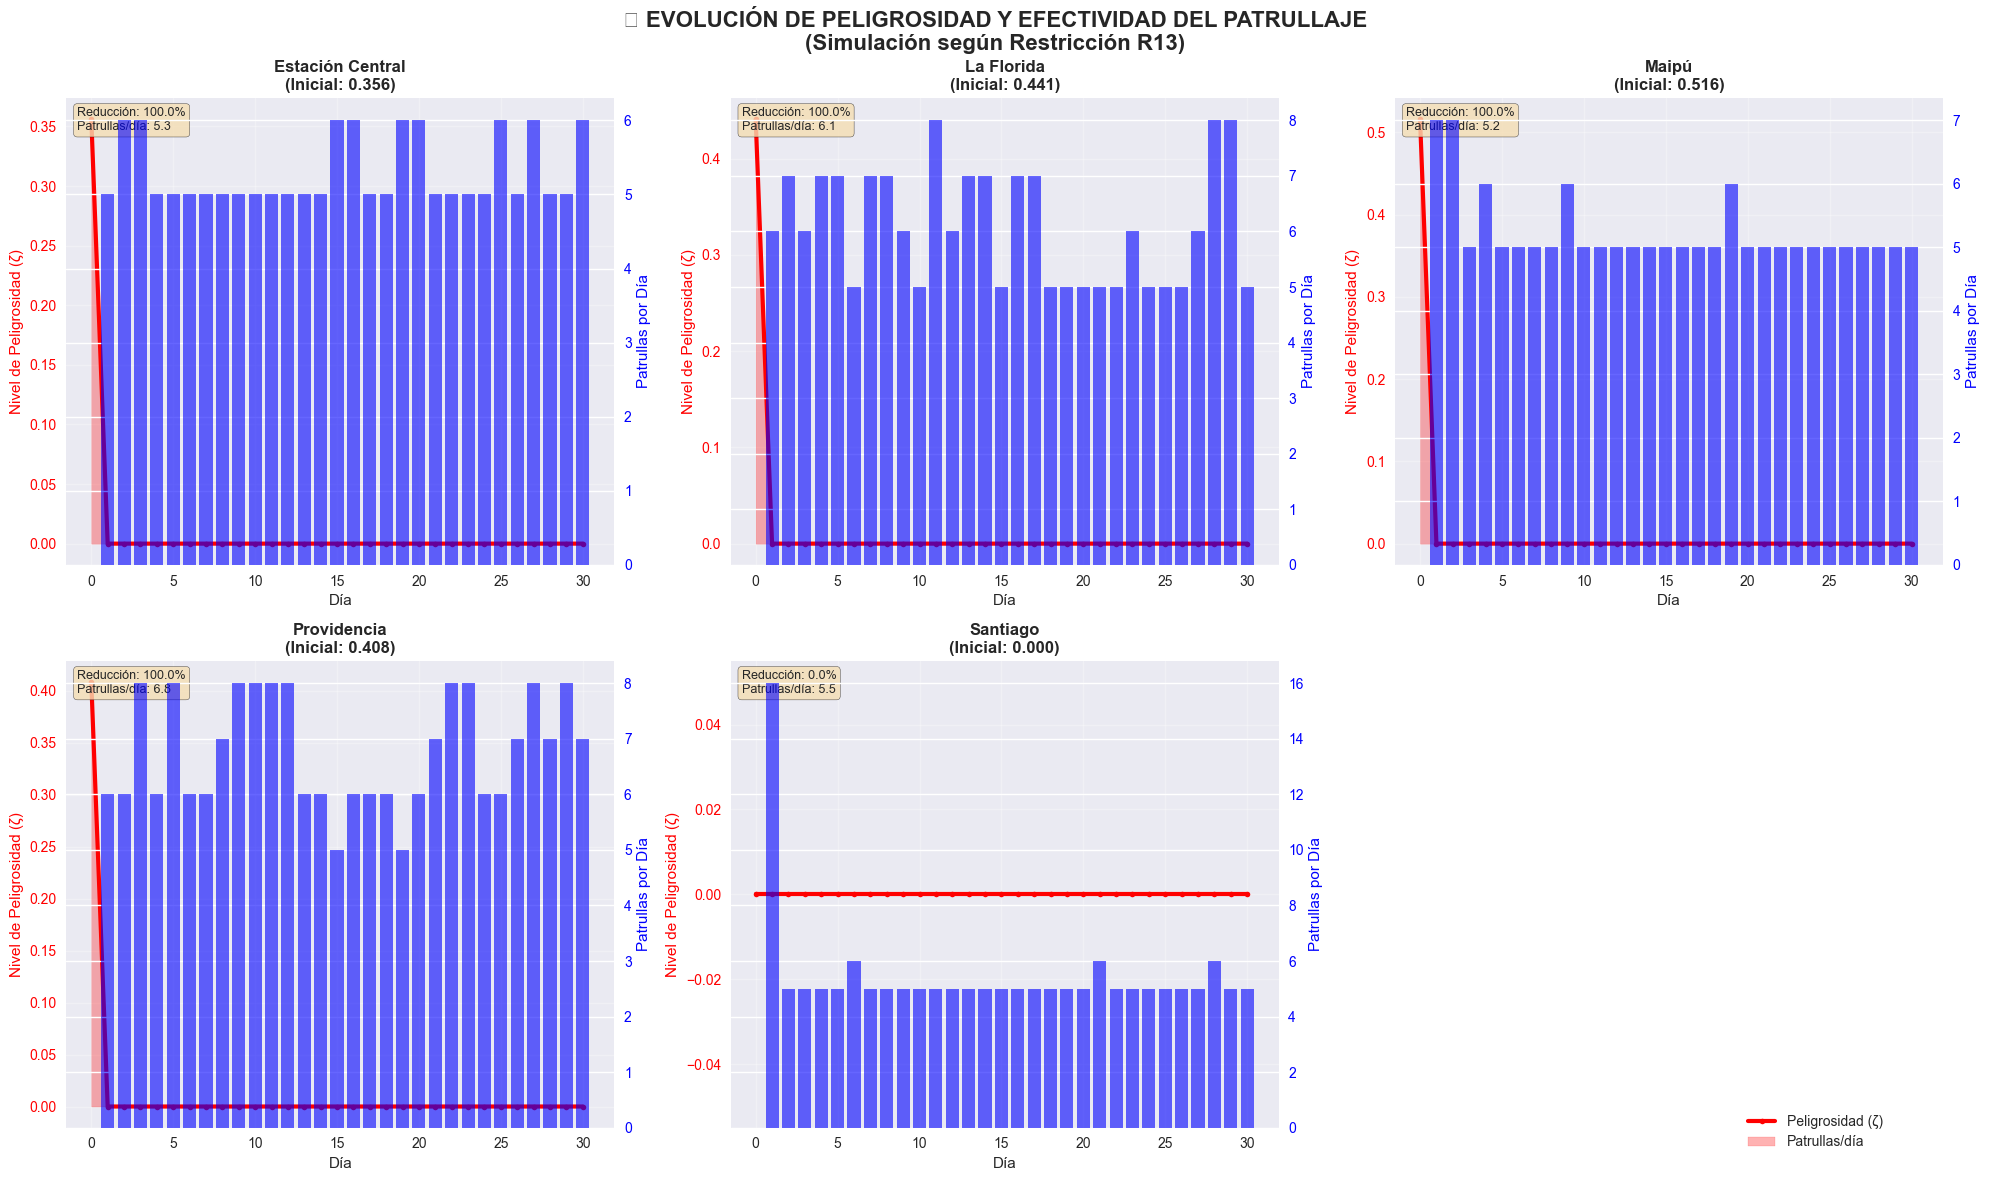

✅ Gráfico creado para 5 zonas
🎯 Interpretación: Las zonas con más patrullaje mantienen peligrosidad baja
📈 Efecto R13: Cada patrulla reduce 0.1 unidades de peligrosidad por día


In [23]:
# 📊 GRÁFICO: EVOLUCIÓN DE PELIGROSIDAD Y EFECTIVIDAD DEL PATRULLAJE

print("\n" + "="*70)
print("📊 CREANDO GRÁFICO DE EVOLUCIÓN DE PELIGROSIDAD")
print("="*70)

# 1. Extraer patrones de patrullaje por zona
patrullaje_diario = defaultdict(lambda: defaultdict(int))
for _, row in variables_df.iterrows():
    var_name = str(row['variable'])
    if var_name.startswith('x['):  # x[p,z,m,t]
        match = re.search(r'x\[(\d+),(\d+),(\d+),(\d+)\]', var_name)
        if match:
            p, z, m, t = map(int, match.groups())
            patrullaje_diario[z][t] += 1

# 2. Simular evolución teórica de peligrosidad según R13
# Restricción R13: zeta[z,t] = zeta[z,t-1] + criminalidad_diaria + lambda*deficit - Gamma*patrullaje

def simular_peligrosidad(zona_id, inicial, patrullaje_dict):
    """Simula evolución de peligrosidad según restricción R13"""
    criminalidad_base = inicial  # Peligrosidad base
    criminalidad_diaria = 0.2 * criminalidad_base  # 20% diario nuevo
    gamma = 0.1  # Factor reducción por patrullaje
    
    peligrosidad = [inicial]  # Día 0
    
    for dia in range(1, 31):
        pelig_anterior = peligrosidad[-1]
        patrullas_dia = patrullaje_dict.get(dia, 0)
        
        # R13: nueva_peligrosidad = anterior + criminalidad_nueva - efecto_patrullaje
        nueva_pelig = pelig_anterior + criminalidad_diaria - (gamma * patrullas_dia)
        nueva_pelig = max(0, nueva_pelig)  # No puede ser negativa
        
        peligrosidad.append(nueva_pelig)
    
    return peligrosidad

# 3. Crear gráfico con subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🎯 EVOLUCIÓN DE PELIGROSIDAD Y EFECTIVIDAD DEL PATRULLAJE\n(Simulación según Restricción R13)', 
             fontsize=16, fontweight='bold')

zonas_graficadas = 0
for zona_id in sorted(zonas_utilizadas):
    if zona_id in peligrosidad_inicial_conocida:
        fila = zonas_graficadas // 3
        col = zonas_graficadas % 3
        ax = axes[fila, col]
        
        # Datos
        inicial = peligrosidad_inicial_conocida[zona_id]
        patrullaje = patrullaje_diario[zona_id]
        peligrosidad_sim = simular_peligrosidad(zona_id, inicial, patrullaje)
        dias = list(range(31))
        
        # Patrullaje diario
        patrullas_dias = [patrullaje.get(d, 0) for d in range(1, 31)]
        
        # Gráfico dual
        ax2 = ax.twinx()
        
        # Línea de peligrosidad
        line1 = ax.plot(dias, peligrosidad_sim, 'r-', linewidth=3, 
                       label='Peligrosidad (ζ)', marker='o', markersize=4)
        ax.fill_between(dias, peligrosidad_sim, alpha=0.3, color='red')
        
        # Barras de patrullaje
        line2 = ax2.bar(range(1, 31), patrullas_dias, alpha=0.6, color='blue', 
                       label='Patrullas/día', width=0.8)
        
        # Configuración
        nombre_zona = zona_nombres.get(zona_id, f"Zona {zona_id}")
        ax.set_title(f'{nombre_zona}\n(Inicial: {inicial:.3f})', fontweight='bold')
        ax.set_xlabel('Día')
        ax.set_ylabel('Nivel de Peligrosidad (ζ)', color='red')
        ax2.set_ylabel('Patrullas por Día', color='blue')
        
        # Colores ejes
        ax.tick_params(axis='y', labelcolor='red')
        ax2.tick_params(axis='y', labelcolor='blue')
        
        # Grillas
        ax.grid(True, alpha=0.3)
        
        # Estadísticas
        pelig_final = peligrosidad_sim[-1]
        reduccion = ((inicial - pelig_final) / inicial) * 100 if inicial > 0 else 0
        patrullas_promedio = np.mean(patrullas_dias)
        
        ax.text(0.02, 0.98, f'Reducción: {reduccion:.1f}%\nPatrullas/día: {patrullas_promedio:.1f}', 
                transform=ax.transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        zonas_graficadas += 1

# Ocultar subplot vacío
if zonas_graficadas < 6:
    axes[1, 2].axis('off')

# Leyenda general
fig.legend(['Peligrosidad (ζ)', 'Patrullas/día'], 
           loc='lower right', bbox_to_anchor=(0.95, 0.02))

plt.tight_layout()
plt.show()

print(f"✅ Gráfico creado para {zonas_graficadas} zonas")
print(f"🎯 Interpretación: Las zonas con más patrullaje mantienen peligrosidad baja")
print(f"📈 Efecto R13: Cada patrulla reduce 0.1 unidades de peligrosidad por día")


In [11]:
# Extraer función objetivo
u_vars = variables_df[variables_df['variable'].str.startswith('u[')].copy()
zeta_vars = variables_df[variables_df['variable'].str.startswith('zeta[')].copy()
funcion_objetivo = u_vars['valor'].sum() if not u_vars.empty else 0

# Crear dashboard ejecutivo
print("="*80)
print("🚔 DASHBOARD EJECUTIVO - MODELO DE PATRULLAJE PREVENTIVO")
print("="*80)

# Métricas principales
total_patrullas = sum(heatmap_df.values.flatten())
total_dias = len(dias_utilizados)
total_zonas = len(zonas_utilizadas)
promedio_patrullas_dia = total_patrullas / total_dias

print(f"\n📊 MÉTRICAS PRINCIPALES:")
print(f"   🎯 Función objetivo óptima: {funcion_objetivo:.6f}")
print(f"   📅 Período planificado: {total_dias} días")
print(f"   🏙️ Comunas cubiertas: {total_zonas}")
print(f"   🚔 Total patrullas asignadas: {total_patrullas:,}")
print(f"   📈 Promedio patrullas/día: {promedio_patrullas_dia:.1f}")
print(f"   🚗 Vehículos utilizados: {len(vehiculos_utilizados)}")

print(f"\n🏆 RANKING DE COMUNAS (por recursos asignados):")
for i, (zona, total) in enumerate(totales_por_zona.items(), 1):
    porcentaje = (total / total_patrullas) * 100
    promedio_zona = total / total_dias
    print(f"   {i}. {zona}: {total} patrullas ({porcentaje:.1f}% del total, {promedio_zona:.1f}/día)")

print(f"\n🚗 COMPOSICIÓN DE FLOTA:")
for tipo, cantidad in zip(tipos_nombres, tipos_cantidades):
    porcentaje = (cantidad / sum(tipos_cantidades)) * 100
    print(f"   • {tipo}: {cantidad} unidades ({porcentaje:.1f}%)")

# Eficiencia del modelo
eficiencia_flota = (len(vehiculos_utilizados) / len(vehiculos_df)) * 100
variables_por_dia = len(variables_df) / total_dias

print(f"\n⚡ INDICADORES DE EFICIENCIA:")
print(f"   📊 Eficiencia de flota: {eficiencia_flota:.1f}% del parque total")
print(f"   🔢 Variables promedio/día: {variables_por_dia:.0f}")
print(f"   💰 Costo-beneficio: {(total_patrullas/funcion_objetivo):.0f} patrullas por unidad de peligrosidad")

if not zeta_vars.empty:
    cobertura = ((total_zonas * total_dias - len(zeta_vars)) / (total_zonas * total_dias)) * 100
    print(f"   ✅ Cobertura lograda: {cobertura:.1f}% (déficits en {len(zeta_vars)} casos)")

print(f"\n🎯 CONCLUSIONES:")
print(f"   • Modelo optimizado para {total_zonas} comunas prioritarias de Santiago")
print(f"   • Plan operativo de {total_dias} días con {total_patrullas:,} asignaciones")
print(f"   • Utilización eficiente de {len(vehiculos_utilizados)} vehículos ({eficiencia_flota:.1f}% del parque)")
print(f"   • Función objetivo minimizada: {funcion_objetivo:.6f} (menor = mejor seguridad)")

print("\n" + "="*80)
print("✅ DASHBOARD COMPLETADO")
print("📁 Para análisis detallado, ejecuta: python analizador_resultados.py")
print("="*80)


🚔 DASHBOARD EJECUTIVO - MODELO DE PATRULLAJE PREVENTIVO

📊 MÉTRICAS PRINCIPALES:
   🎯 Función objetivo óptima: 120.321452
   📅 Período planificado: 30 días
   🏙️ Comunas cubiertas: 5
   🚔 Total patrullas asignadas: 866
   📈 Promedio patrullas/día: 28.9
   🚗 Vehículos utilizados: 92

🏆 RANKING DE COMUNAS (por recursos asignados):
   1. Providencia: 203 patrullas (23.4% del total, 6.8/día)
   2. La Florida: 183 patrullas (21.1% del total, 6.1/día)
   3. Santiago: 164 patrullas (18.9% del total, 5.5/día)
   4. Estación Central: 159 patrullas (18.4% del total, 5.3/día)
   5. Maipú: 157 patrullas (18.1% del total, 5.2/día)

🚗 COMPOSICIÓN DE FLOTA:
   • Moto: 33 unidades (35.9%)
   • Bicicleta: 9 unidades (9.8%)
   • Caballo: 8 unidades (8.7%)
   • Furgón: 7 unidades (7.6%)
   • Auto: 35 unidades (38.0%)

⚡ INDICADORES DE EFICIENCIA:
   📊 Eficiencia de flota: 9.0% del parque total
   🔢 Variables promedio/día: 100
   💰 Costo-beneficio: 7 patrullas por unidad de peligrosidad
   ✅ Cobertura log